In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, RobustScaler

C:\Users\loqma\Miniconda3\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
C:\Users\loqma\Miniconda3\lib\site-packages\sklearn\linear_model\least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps, copy_X=True, fit_path=T

# Load data

In [72]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [4]:
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Type casting into float32 to reduce memory usage

In [5]:
train = train.astype('float32')
test = test.astype('float32')

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: float32(785)
memory usage: 125.8 MB


#### Plot the first 40 digit for visualization

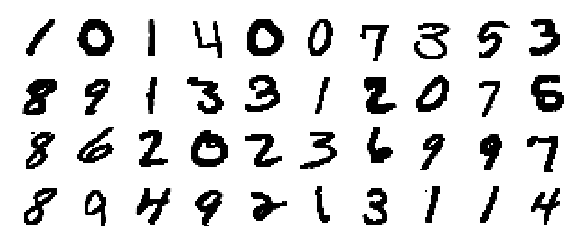

In [7]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(28, 28),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(train.drop('label', axis=1).to_numpy())

In [41]:
X = train.drop('label', axis=1)
y = train['label']

In [42]:
# convert output into 10 class matrices
y = keras.utils.to_categorical(np.squeeze(y), 10)

In [43]:
X_train, X_val, y_train, y_val = train_test_split(X, y)

Reshape the array for CNN

In [44]:
X_train = X_train.to_numpy()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.to_numpy()
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)

In [45]:
X_train.shape

(31500, 28, 28, 1)

In [46]:
y_train.shape

(31500, 10)

# Multilayer Perceptron

## Architecture
- One convolutional layer (6x6 convolution) 
- Max pooling to reduce the size by a factor of 2 in each axis
- Two hidden layers with 2x and x nodes with relu
- 10 nodes output layer with softmax since we have 10 possible outputs

In [30]:
# import keras packages
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [65]:
# define MLP model
model = Sequential()
model.add(Conv2D(6, kernel_size = (6, 6),
                activation = 'relu',
                input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(40, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [66]:
# compile model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [67]:
# training
history = model.fit(X_train, y_train,
              batch_size=32,
              epochs=25,
              verbose=1,
              validation_data=(X_val, y_val))

Epoch 1/25
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
984/985 [============================>.] - ETA: 0s - loss: 1.5608 - accuracy: 0.5124WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000016565560488> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`

#### Model evaluation

In [68]:
# print train and test losses and classification accuracies
score = model.evaluate(X_train, y_train, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])
score = model.evaluate(X_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train loss: 0.007738640531897545
Train accuracy: 0.9974920749664307
Test loss: 0.15972335636615753
Test accuracy: 0.975523829460144


In [73]:
test = test.to_numpy()

In [74]:
test = test.reshape(test.shape[0], 28, 28, 1)

#### Predict test dataset with the model

In [75]:
y_pred = model.predict(test)

875/875 [==============================] - 2s 2ms/step


In [76]:
y_pred = np.argmax(y_pred, axis=1)

In [77]:
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['ImageId'],pred],axis=1)
datasets.columns=['ImageId','Label']
datasets.to_csv('submission.csv',index=False)

In [78]:
datasets

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
